# Data statistical properties

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from src.misc import load_processed_dataset
import sys  

sys.path.insert(1, '/Users/simon/Documents/II/Dissertation/')
%load_ext autoreload
%autoreload 2

Features:

In [2]:
load_processed_dataset("jpm", "2019-01-1", "2024-01-1").columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'log_return',
       'log_return_open', 'log_return_high', 'log_return_low',
       'log_return_volume', 'log_return_forecast', 'sma', 'wma', 'ema', 'dema',
       'tema', 'aroon', 'rsi', 'willr', 'cci', 'ad', 'mom', 'slowk', 'slowd',
       'macd', 'fed_funds_rate', '^N225', '^IXIC', '^FTSE', '^SPX', '^DJI'],
      dtype='object')

Data

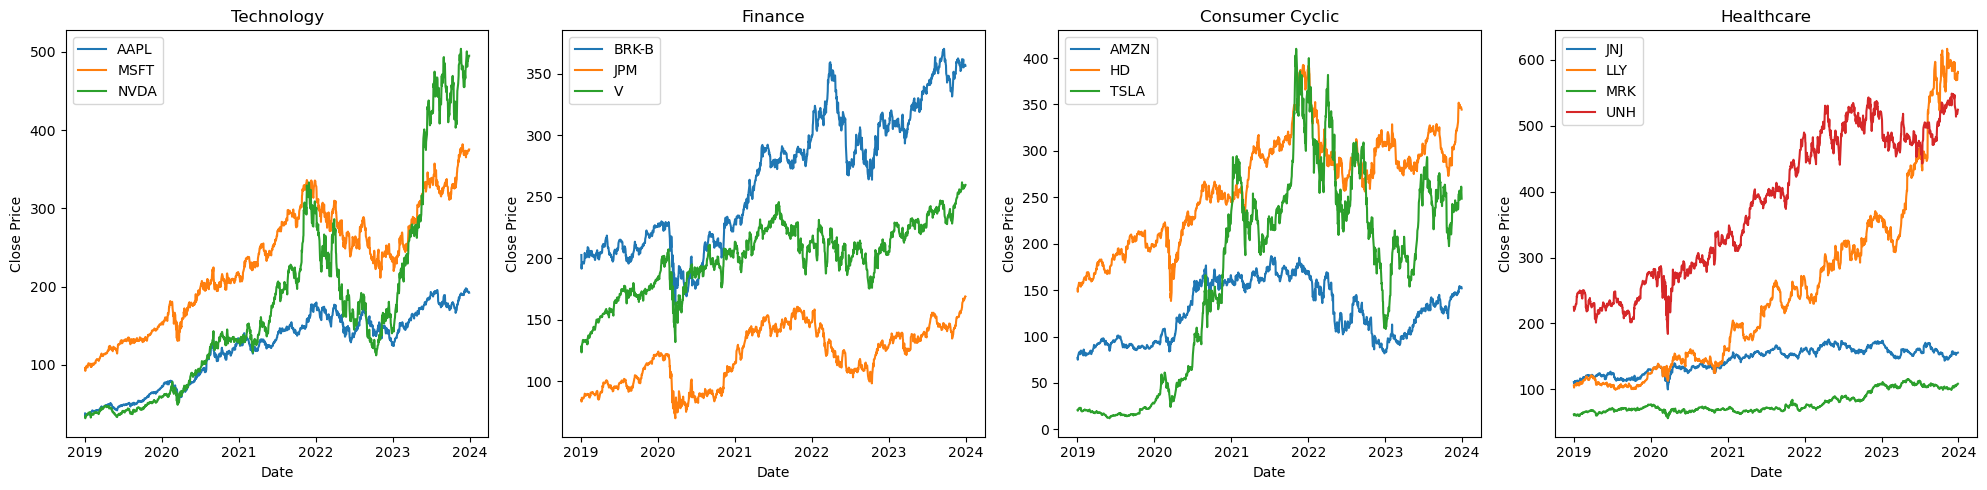

In [6]:
all_stocks = ["aapl", "amzn", "avgo", "brk-b", "cost", "hd", "jnj", "jpm", "lly", "ma", "meta", "mrk", "msft", "nvda", "pg", "tsla", "unh", "v", "xom"]
sectors = {
    "technology": ["aapl", "msft", "nvda"],
    "finance": ["brk-b", "jpm", "v"],
    "consumer cyclic": ["amzn", "hd", "tsla"],
    "healthcare": ["jnj", "lly", "mrk", "unh"]
}

fig, axs = plt.subplots(1, 4, figsize=(20, 5)) 
for i, (name, stocks) in enumerate(sectors.items()):
    for s in stocks:
        df = load_processed_dataset(s, "2019-01-1", "2024-01-1")
        axs[i].plot(df.index, df['Close'], label=s.upper())
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Close Price')
    axs[i].legend()
    axs[i].set_title(name.title())
fig.tight_layout()
plt.show()


Stocks selection

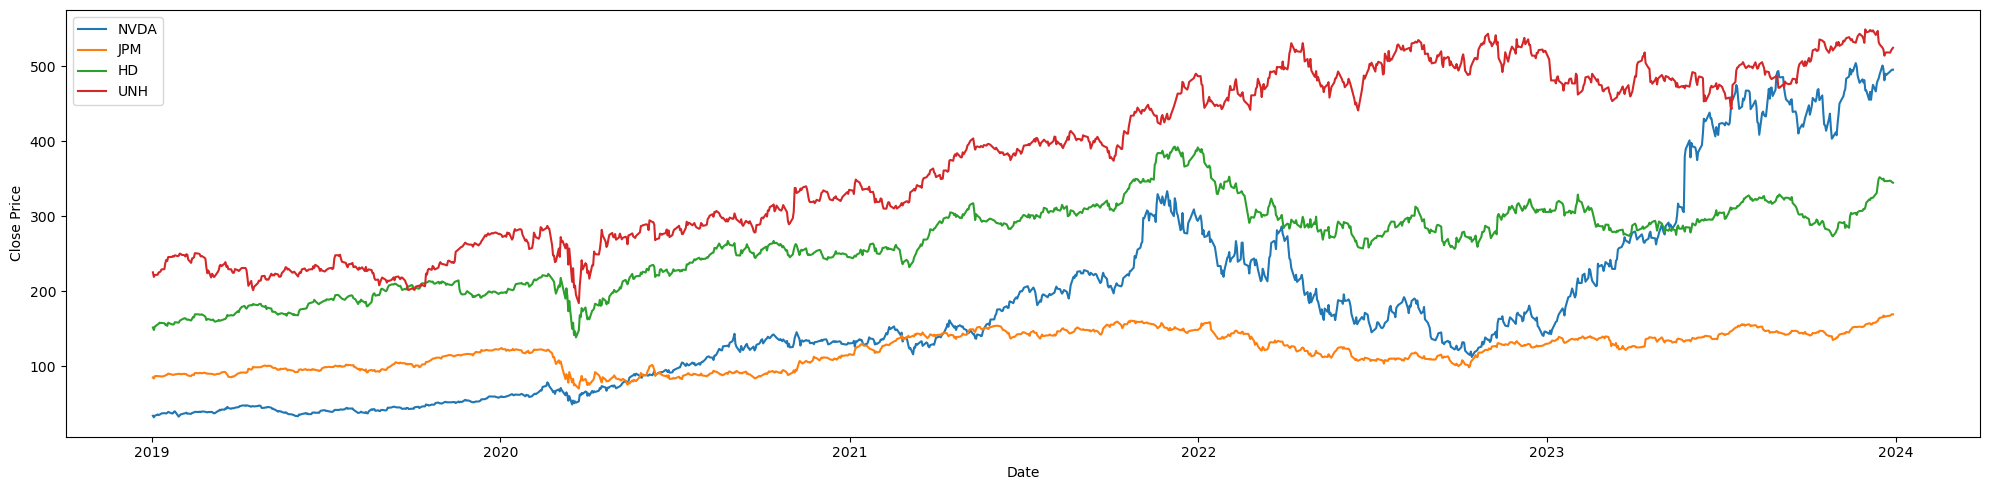

In [7]:
selected = ["nvda", "jpm", "hd", "unh"]
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
for s in selected:
    df = load_processed_dataset(s, "2019-01-1", "2024-01-1")
    ax.plot(df.index, df['Close'], label=s.upper())
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()
fig.tight_layout()
plt.show()

Log Returns Transformation

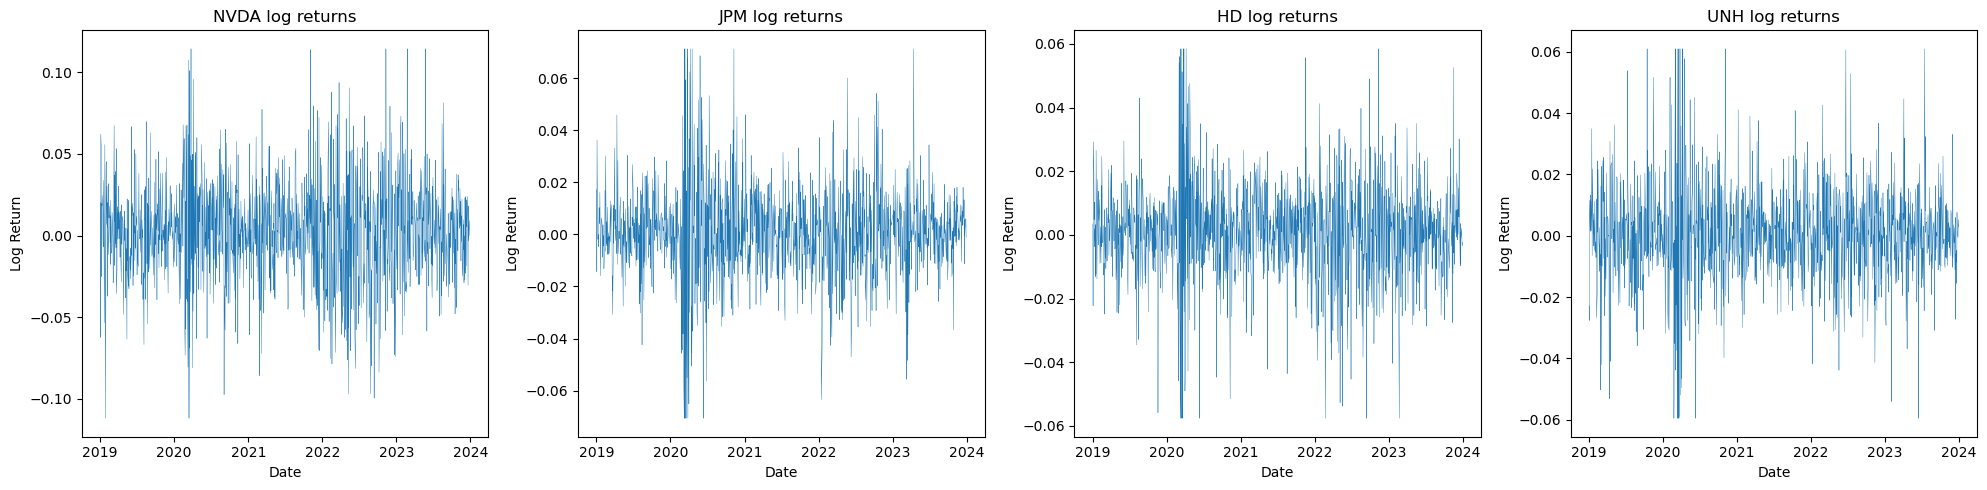

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5)) 
for i, s in enumerate(selected):
    df = load_processed_dataset(s, "2019-01-1", "2024-01-1")
    axs[i].plot(df.index, df['log_return'], linewidth=0.3)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Log Return')
    axs[i].set_title(f"{s.upper()} log returns")
fig.tight_layout()
plt.show()

/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na op

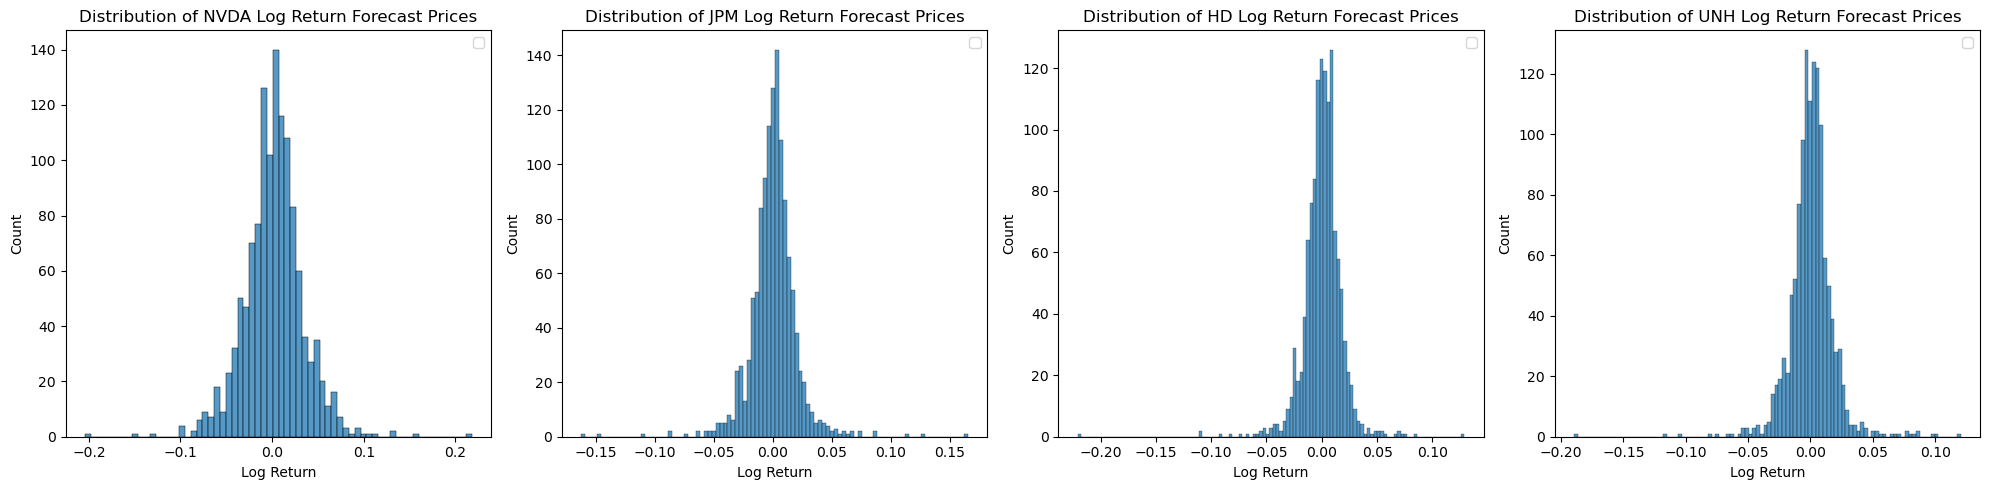

In [18]:
selected = ["nvda", "jpm", "hd", "unh"]

fig, axs = plt.subplots(1, 4, figsize=(20, 5)) 
for i, s in enumerate(selected):
    df = load_processed_dataset(s, "2019-01-1", "2024-01-1")
    sns.histplot(df['log_return_forecast'], kde=False, ax=axs[i], stat="count")
    axs[i].set_title(f'Distribution of {s.upper()} Log Return Forecast Prices')
    axs[i].set_xlabel('Log Return')
    axs[i].legend()
fig.tight_layout()
plt.show()

Outlier treatment

/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

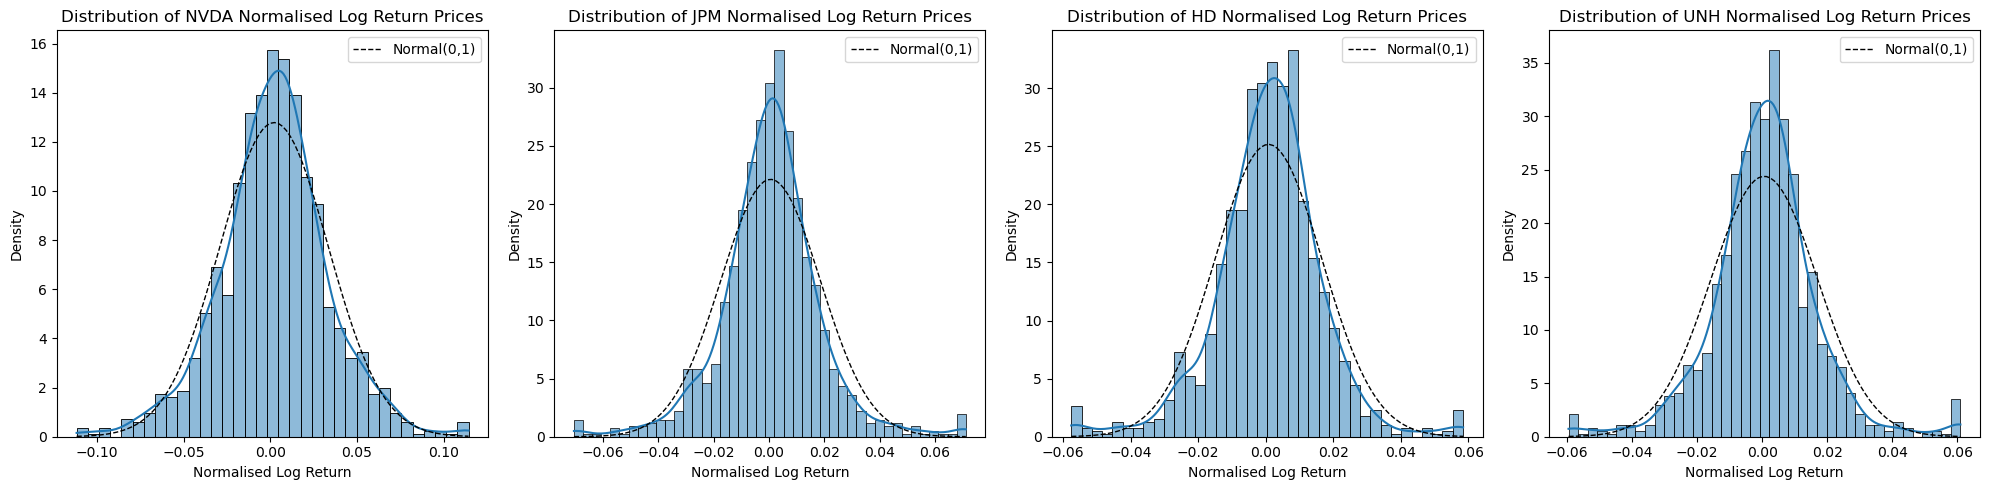

In [19]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5)) 
for i, s in enumerate(selected):
    df = load_processed_dataset(s, "2019-01-1", "2024-01-1")

    mean = df['log_return'].mean()
    std = df['log_return'].std()
    log_return = df['log_return'] 
    sns.histplot(log_return, kde=True, ax=axs[i], stat="density")
    axs[i].set_title(f'Distribution of {s.upper()} Normalised Log Return Prices')
    axs[i].set_xlabel('Normalised Log Return')

    x = np.linspace(min(log_return), max(log_return), 100)
    p = stats.norm.pdf(x, mean, std)
    axs[i].plot(x, p, 'k', linewidth=1, label=f'Normal(0,1)', linestyle="--")
    axs[i].legend()
fig.tight_layout()
plt.show()

Q-Q Plot

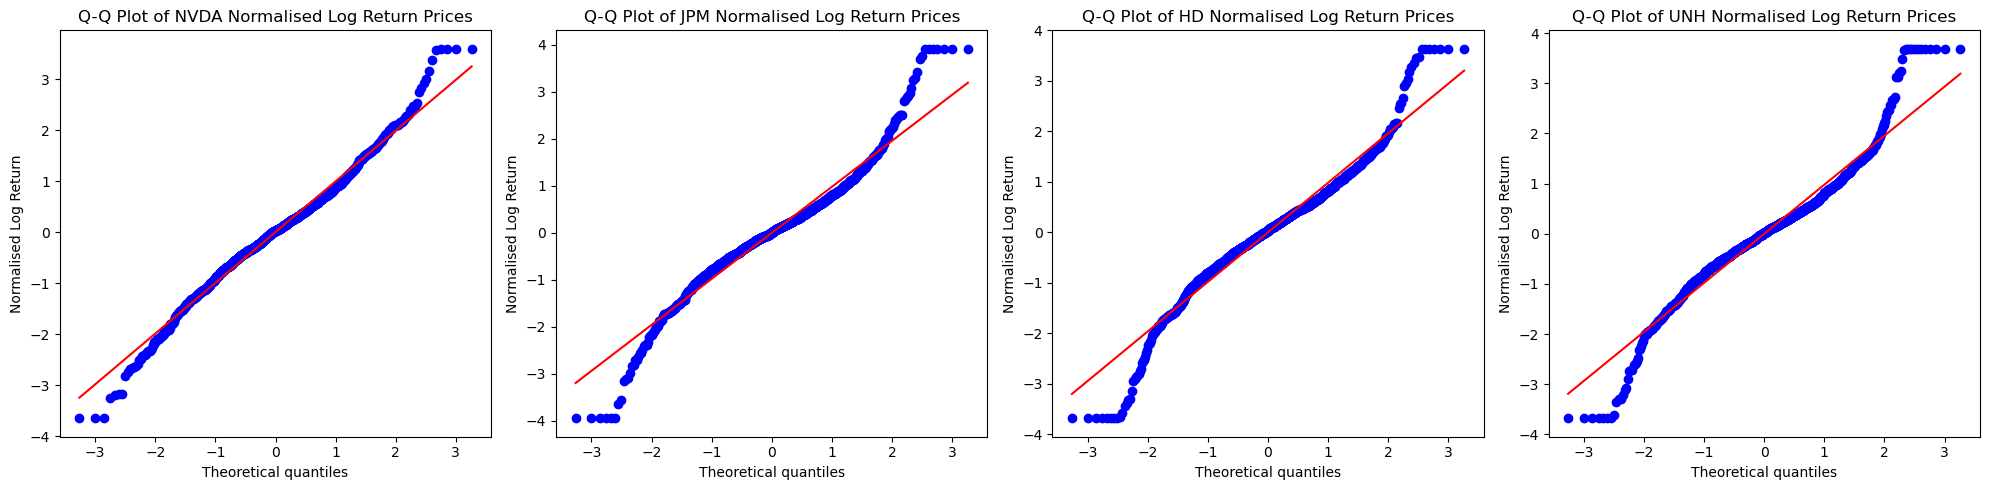

In [20]:
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

fig, axs = plt.subplots(1, 4, figsize=(20, 5)) 
for i, s in enumerate(selected):
    df = load_processed_dataset(s, "2019-01-1", "2024-01-1")
    mean = df['log_return'].mean()
    std = df['log_return'].std()
    log_return = (df['log_return'] - mean) / std
    # Q-Q plot
    stats.probplot(log_return, dist="norm", plot=axs[i])
    axs[i].set_title(f'Q-Q Plot of {s.upper()} Normalised Log Return Prices')
    axs[i].set_ylabel('Normalised Log Return')
fig.tight_layout()
plt.show()

Outlier treatment figures

/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

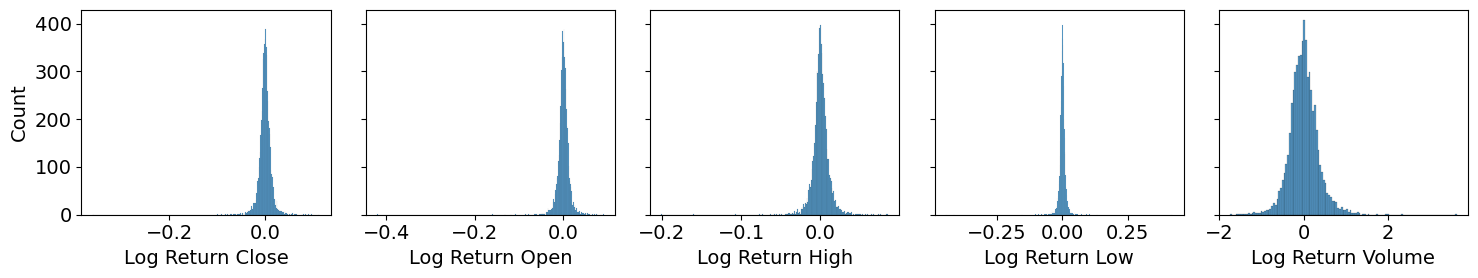

In [83]:
cols = ["Close", "Open", "High", "Low", "Volume"]
stock = "PG"

fig, axs = plt.subplots(1, 5, figsize=(15, 3), sharey=True) 
for i, c in enumerate(cols):
    df = load_processed_dataset(stock, "2000-01-1", "2024-01-1")
    log_ret = np.log(df[c]/df[c].shift(1))
    sns.histplot(log_ret, kde=False, ax=axs[i])
    axs[i].set_xlabel(f'Log Return {c}')
fig.tight_layout()
plt.show()

/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

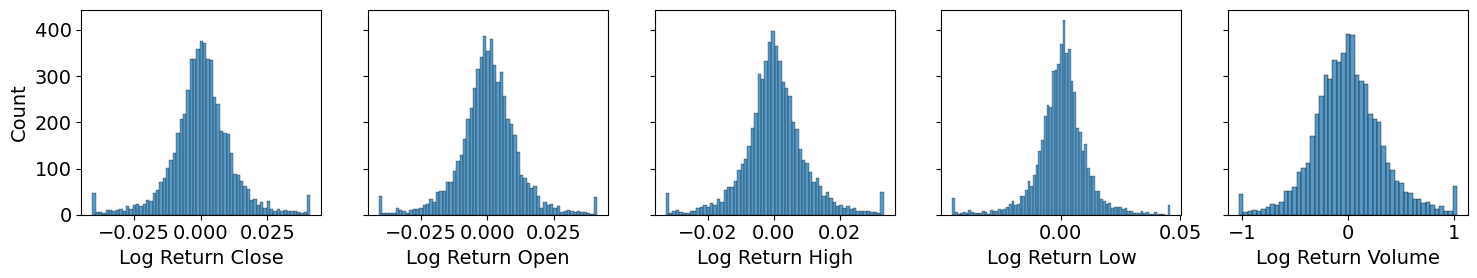

In [85]:
cols = ["log_return", "log_return_open", "log_return_high", "log_return_low", "log_return_volume"]
stock = "PG"

fig, axs = plt.subplots(1, 5, figsize=(15, 3), sharey=True) 
for i, c in enumerate(cols):
    df = load_processed_dataset(stock, "2000-01-1", "2024-01-1")
    sns.histplot(df[f'{c}'], kde=False, ax=axs[i])
    axs[i].set_xlabel(" ".join(c.split("_")).title() + (" Close" if c=="log_return" else ""))
fig.tight_layout()
plt.show()

Now it is important to diagnose residuals. We would like to residuals to be uncorerelated and zero mean. If there is correlation between residuals, then there is information left in the residuals which can be used in computing the forecast. If the residuals have non-zero mean, then our forecasts are biased. Ideally, it woudld also be nice, but not necessary, to have constant variance and a normal distribution which make calculation of prediction intervals easier.

So residuals plot show whether our forecasts appear to account for all information. Talk about the
- Mean of residuals close to zero? (Histogram)
- Correlation in residuals series? (ACF)
- Variation of residuals constant? (Time series, histogram)
- Normal distribution (histogram) or tails too long? Even when ignoring outlioers? If not normal, confidence intervals computed assuming a normal distribution will be inaccurate.

A prediction interval gives an interval in which we expect $y_t$ to lie with a specified probability. A prediction interval for a $h$-step forecast is
$$
\hat{y}_{T+h}\pm c\hat\sigma_h
$$
where $c$ depends on the coverage probability, $\hat\sigma_h$ is the estimated standard deviation of the $h$-step forecast distribution.

For one-step ahead forecasts, the standard deviation of the forecast is almost the same as the standard deviation of the residuals. So if we have a prediction of 531.48, and the standard deviation of our residuals is 6.21, our 95% interval is 531.48$\pm$ 1.96(6.21), since we are assuming a normal distirbution, and 95% of the probability mass in a normal distribution falls within 1.96 standard deviations on either side of it.

However, if a normal distribution for forecast errors is an unreasonable assumption, we can use bootstrapping. We sample from the residuals and repeatedly simulate a set of future values. Then we calculate percentiles for each forecast horizon.

NB. if transformations has been used, the prediction interval should be computed on the transformed scale, and the end points inverse-transformed to give a prediction interval on the original scale. May not be symmetric around point forecast.

Plotting return against its forecast

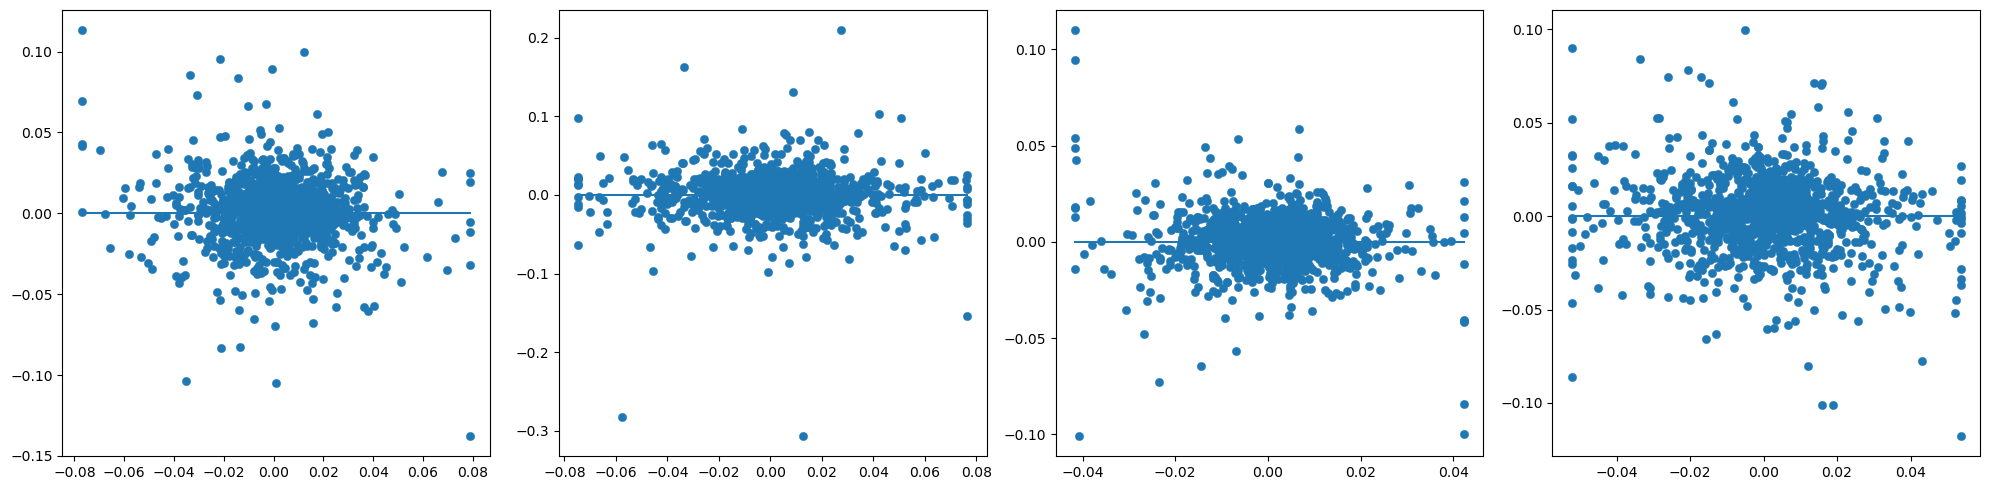

In [15]:
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

fig, axs = plt.subplots(1, 4, figsize=(20, 5)) 
for i, s in enumerate(selected):
    df = load_processed_dataset(s, "2019-01-1", "2024-01-1")
    feature = "Dividends"
    axs[i].scatter(df["log_return"], df["log_return_forecast"], label=s, linewidth=0.3)
    x = np.linspace(start=df["log_return"].min(), stop=df["log_return"].max(), num=100)
    y = np.zeros(len(x))
    axs[i].plot(x, y)
fig.tight_layout()
plt.show()

In [19]:
df = load_processed_dataset("nvda", "2004-01-1", "2024-01-1").sample(1000)
features = [ 'log_return',
       'log_return_open', 'log_return_high', 'log_return_low',
       'log_return_volume', 'log_return_forecast', 'sma', 'wma', 'ema', 'dema',
       'tema', 'aroon', 'rsi', 'willr', 'cci', 'ad', 'mom', 'slowk', 'slowd',
       'macd', 'fed_funds_rate', '^N225', '^IXIC', '^FTSE', '^SPX', '^DJI']

Pair plot between OHCLV features

/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

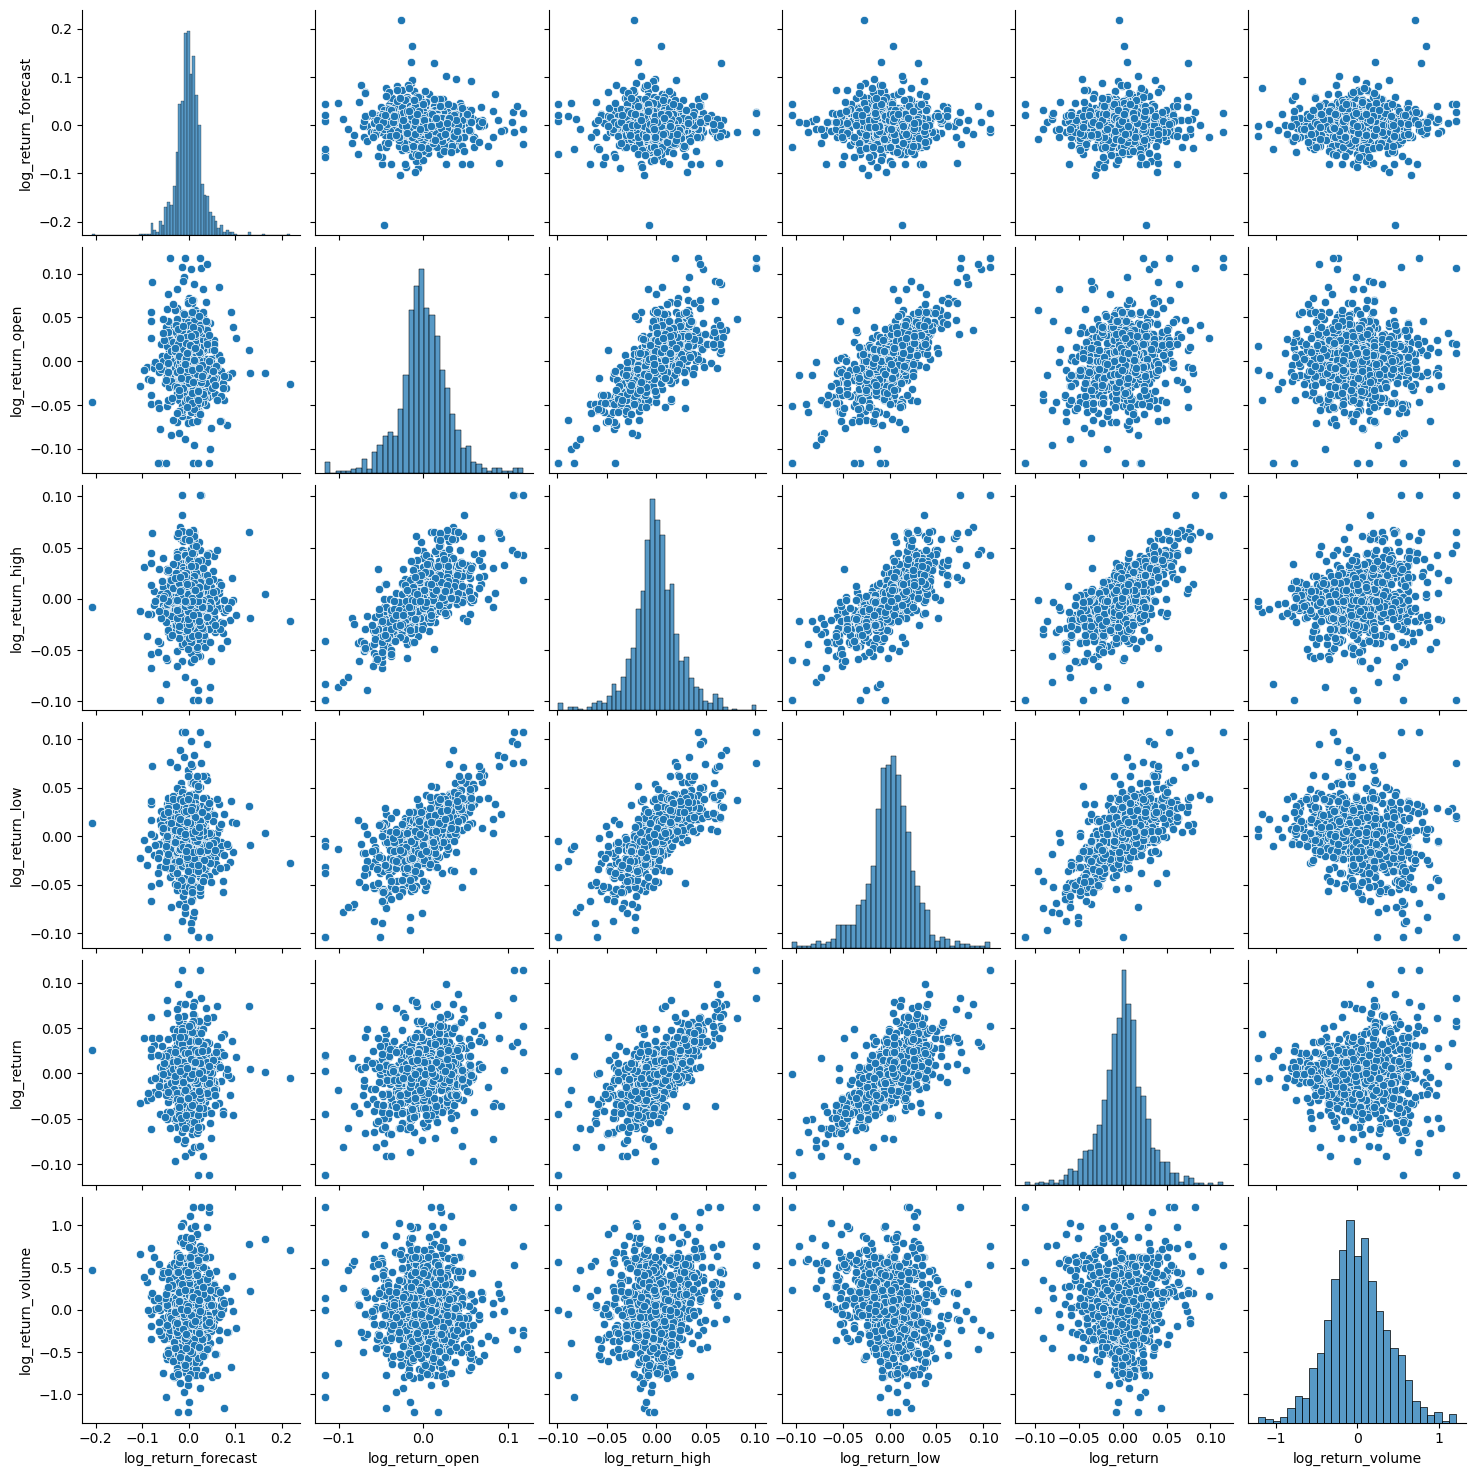

In [20]:
features = ['log_return_forecast',
       'log_return_open', 'log_return_high', 'log_return_low',
       'log_return', 'log_return_volume']
_ = sns.pairplot(df[features], kind="scatter", diag_kind="hist")

Pair plot between macroeconomic features

/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

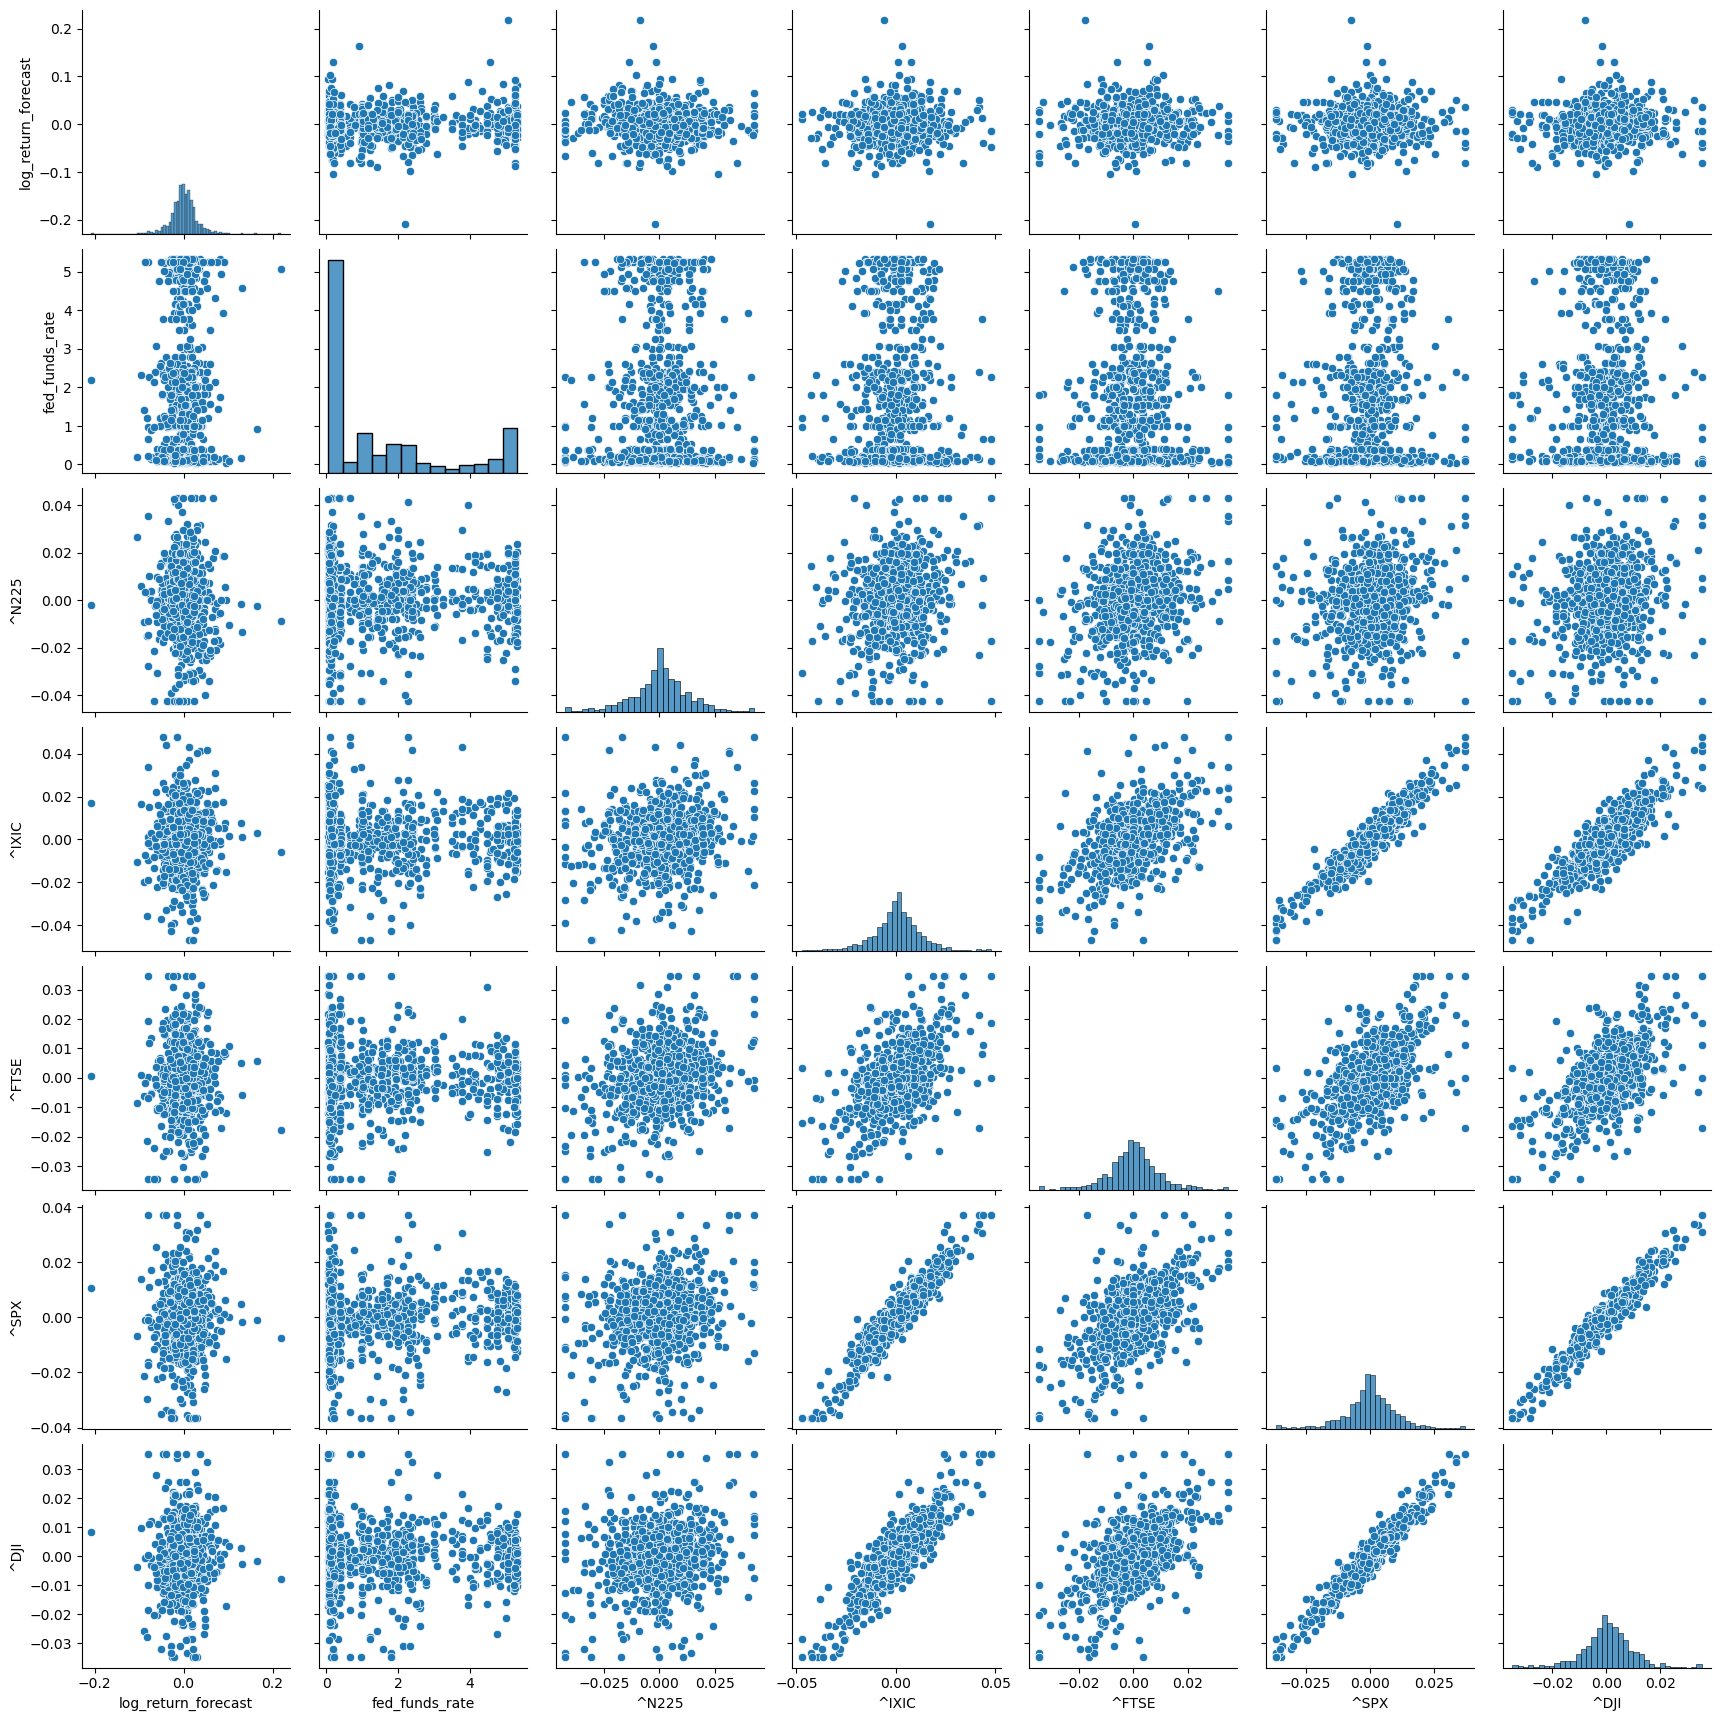

In [22]:
features = ['log_return_forecast', 'fed_funds_rate', '^N225', '^IXIC', '^FTSE', '^SPX', '^DJI']
_ = sns.pairplot(df[features], kind="scatter", diag_kind="hist")